In [1]:
from lpaaj.constants import RESULTS_DIR, GRAPH_PATH

import os, pickle
import matplotlib.pyplot as plt

In [2]:
models = os.listdir(f"{RESULTS_DIR}/mtbench")

In [6]:
for model in models:
    s_probes = pickle.load(open(f"{RESULTS_DIR}/mtbench/{model}/s-probes.pkl", "rb"))
    u_probes = pickle.load(open(f"{RESULTS_DIR}/mtbench/{model}/u-probes.pkl", "rb"))
    xcoords = [i/len(s_probes) for i in range(len(s_probes))]

    fig, ax = plt.subplots(figsize=(13, 5))
    for model in models:
        s_probes = pickle.load(open(f"{RESULTS_DIR}/mtbench/{model}/s-probes.pkl", "rb"))
        xcoords = [i/len(s_probes) for i in range(len(s_probes))]
        ax.plot(xcoords, s_probes, label=model)
    ax.legend()
    ax.set_ylim(0, 1)
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xlabel("Layer", fontsize=16)
    ax.set_ylabel("F1 Score", fontsize=16)
    ax.set_title("Supervised Probes", fontsize=16)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x*100)}%'))
    plt.tight_layout()
    plt.savefig(f"{PATH}/layers-s-probes.png", dpi=400)
    plt.close()

    fig, ax = plt.subplots(figsize=(13, 5))
    for model in models:
        u_probes = pickle.load(open(f"{RESULTS_DIR}/mtbench/{model}/u-probes.pkl", "rb"))
        xcoords = [i/len(u_probes) for i in range(len(u_probes))]
        ax.plot(xcoords, u_probes, label=model)
    ax.legend()
    ax.set_ylim(0, 1)
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xlabel("Layer", fontsize=16)
    ax.set_ylabel("F1 Score", fontsize=16)
    ax.set_title("Unsupervised Probes", fontsize=16)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x*100)}%'))
    plt.tight_layout()
    plt.savefig(f"{GRAPH_PATH}/layers-u-probes.png", dpi=400)
    plt.close()

In [12]:
import torch as t
import torch.nn.functional as F


s_similarities, u_similarities = [], []

for model in models:
    s_probes = pickle.load(open(f"{RESULTS_DIR}/mtbench/{model}/s-probes.pkl", "rb"))
    u_probes = pickle.load(open(f"{RESULTS_DIR}/mtbench/{model}/u-probes.pkl", "rb"))
    s_probes = [t.Tensor(p) for p in s_probes]
    u_probes = [t.Tensor(p) for p in u_probes]
    for i in range(len(s_probes)):
        for j in range(len(s_probes)):
            if i != j:
                s_similarities.append(F.cosine_similarity(s_probes[i], s_probes[j], dim=0))
                u_similarities.append(F.cosine_similarity(u_probes[i], u_probes[j], dim=0))
    break

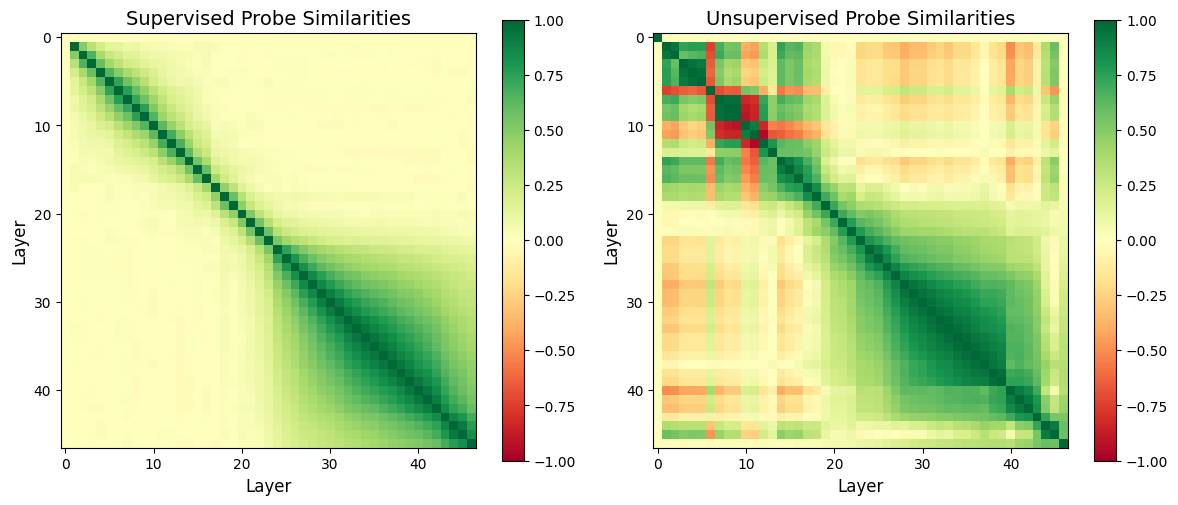

In [14]:
for model in models:
    s_probes = pickle.load(open(f"{RESULTS_DIR}/mtbench/{model}/s-probes.pkl", "rb"))
    u_probes = pickle.load(open(f"{RESULTS_DIR}/mtbench/{model}/u-probes.pkl", "rb"))
    s_probes = [t.Tensor(p) for p in s_probes]
    u_probes = [t.Tensor(p) for p in u_probes]
    
    # Create similarity matrices
    n_layers = len(s_probes)
    s_sim_matrix = t.zeros((n_layers, n_layers))
    u_sim_matrix = t.zeros((n_layers, n_layers))
    
    for i in range(n_layers):
        for j in range(n_layers):
            s_sim_matrix[i,j] = F.cosine_similarity(s_probes[i], s_probes[j], dim=0)
            u_sim_matrix[i,j] = F.cosine_similarity(u_probes[i], u_probes[j], dim=0)
    
    # Plot heatmaps
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Supervised probes heatmap
    im1 = ax1.imshow(s_sim_matrix, cmap='RdYlGn', vmin=-1, vmax=1)
    ax1.set_title('Supervised Probe Similarities', fontsize=14)
    ax1.set_xlabel('Layer', fontsize=12)
    ax1.set_ylabel('Layer', fontsize=12)
    plt.colorbar(im1, ax=ax1)
    
    # Unsupervised probes heatmap  
    im2 = ax2.imshow(u_sim_matrix, cmap='RdYlGn', vmin=-1, vmax=1)
    ax2.set_title('Unsupervised Probe Similarities', fontsize=14)
    ax2.set_xlabel('Layer', fontsize=12)
    ax2.set_ylabel('Layer', fontsize=12)
    plt.colorbar(im2, ax=ax2)
    
    plt.tight_layout()
    # plt.savefig(f"{GRAPH_PATH}/layer_similarities.png", dpi=400)
    # plt.close()
    plt.show()
    break  # Only process first model
    

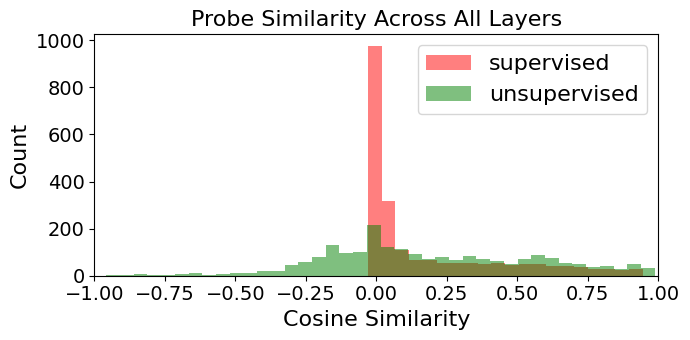

In [13]:
fig, ax = plt.subplots(figsize=(7, 3.5))
ax.hist(s_similarities, color="red", alpha=0.5, bins=20, label="supervised")
ax.hist(u_similarities, color="green", alpha=0.5, bins=40, label="unsupervised")
ax.set_xlabel("Cosine Similarity", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
ax.set_title("Probe Similarity Across All Layers", fontsize=16)
ax.set_xlim(-1, 1)
ax.legend(fontsize=16)
ax.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.savefig(f"{GRAPH_PATH}/cosine_sim_layers.png", dpi=400)
plt.show()